In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
dataset = "/content/drive/MyDrive/Colab Notebooks/project-T5/project/dataset1"

In [4]:
# Starting index for the pictures
pic_index = 0


In [ ]:
#import os
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

# Base directory
#base_dir = './dataset1'

# Directories for training and validation sets
#train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'validation')

In [ ]:

# Classes
#classes = ['assaults', 'drones', 'knives', 'pistols', 'rifles', 'shotgun', 'smartphone']

# Set up matplotlib fig, and size it to fit 4x4 pics
#nrows = 4
#ncols = 4

#fig = plt.gcf()
#fig.set_size_inches(ncols * 4, nrows * 4)

# Starting index for the pictures
#pic_index = 100


<Figure size 1600x1600 with 0 Axes>

In [ ]:

# Function to filter out non-image files
#def is_image_file(filename):
    #return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))


In [ ]:

# Get filenames for each class in the training directories (filtering for image files)
#train_class_fnames = [
    #[os.path.join(train_dir, cls, fname) for fname in class_fnames if is_image_file(fname)]
    #for cls, class_fnames in zip(classes, [os.listdir(os.path.join(train_dir, cls)) for cls in classes])
#]


FileNotFoundError: [WinError 3] The system cannot find the path specified: './dataset1\\train\\assaults'

In [ ]:

# Select the next 8 images for each class
#next_class_pix = [
    #[os.path.join(train_dir, cls, fname) for fname in class_fnames[pic_index - 8:pic_index]]
    #for cls, class_fnames in zip(classes, train_class_fnames)
#]


NameError: name 'train_class_fnames' is not defined

In [ ]:

# Display the selected images in a grid
#for i, class_pix in enumerate(next_class_pix):
    #for j, img_path in enumerate(class_pix):
        # Set up subplot; subplot indices start at 1
        #sp = plt.subplot(nrows, ncols, i * ncols + j + 1)
        #sp.axis('Off')  # Don't show axes (or gridlines)

        #img = mpimg.imread(img_path)
        #plt.imshow(img)

#plt.show()


NameError: name 'next_class_pix' is not defined

In [12]:
IMG_SIZE = 224
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

train_set = tf.keras.utils.image_dataset_from_directory(
    subset="training",
    directory=dataset,
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    validation_split=VALIDATION_SPLIT,
)

valid_set = tf.keras.utils.image_dataset_from_directory(
    subset="validation",
    directory=dataset,
    labels='inferred',
    label_mode='categorical',
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    validation_split=VALIDATION_SPLIT,
)

Found 2314 files belonging to 7 classes.
Using 1852 files for training.
Found 2314 files belonging to 7 classes.
Using 462 files for validation.


In [13]:
train_set.class_names

['assaults', 'drones', 'knives', 'pistols', 'rifles', 'shotgun', 'smartphone']

In [14]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(
    input_shape=(224, 224, 3),  # Shape of our images
    include_top=False,  # Leave out the last fully connected layer
    weights="imagenet",
)

58889256/58889256 [==============================] - 0s 0us/step


In [15]:

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 128 hidden units and ReLU activation
x = layers.Dense(128, activation="relu")(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output

# Change the final layer for classification output
x = layers.Dense(7, activation="softmax")(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

vgghist = model.fit(
    train_set,
    validation_data=valid_set,
    epochs=3
)

Epoch 1/3
18/58 [========>.....................] - ETA: 11:21 - loss: 13.4072 - accuracy: 0.8663

In [ ]:
import matplotlib.pyplot as plt

plt.plot(vgghist.history['loss'], label='Training Loss')
plt.plot(vgghist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



NameError: name 'vgghist' is not defined

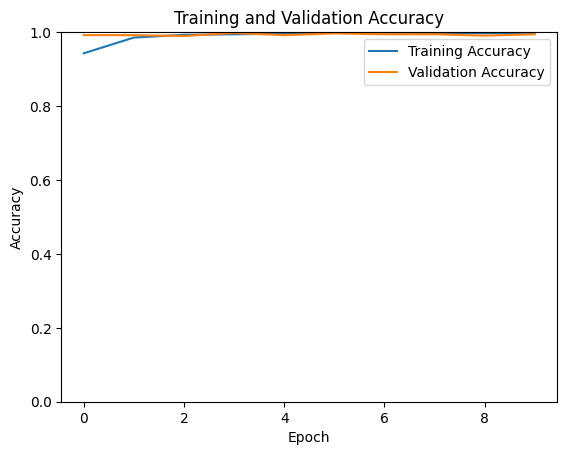

In [ ]:
import matplotlib.pyplot as plt


plt.plot(vgghist.history['accuracy'], label='Training Accuracy')
plt.plot(vgghist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.legend()
plt.show()

